In [26]:
# declare the imports for building our neural network and displaying our data 
import tensorflow as tf
import PIL
import os
import h5py
import sys
import numpy as np
import pandas as pd
import random
import csv
import cv2
import fnmatch
from shutil import copyfile
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from numpy import asarray
from numpy import savetxt
from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from matplotlib import image
from os import listdir
from keras.models import load_model
import visualkeras
from PIL import ImageFont
from collections import defaultdict

# set the input and outpout Dirs
data_dir = 'D:\\finalSet\\'
Output = 'D:\\'

In [1]:
# load all images in a directory
loaded_images = []
labels = []

def find_dirs(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                yield filename
                
def find_files(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                if 'ABDMJ' in directory: labels.append(0)
                elif  'Agen' in directory: labels.append(1)# changes from Agent.BDJM for labeling reasons
                elif  'Allaple'  in directory: labels.append(2)
                elif  'Autoit'  in directory: labels.append(3)
                elif  'Berbew'  in directory: labels.append(4)
                elif  'Bitman'  in directory: labels.append(5)
                elif  'Dinwod' in directory: labels.append(6)
                elif  'Dorkbot'  in directory: labels.append(7)
                elif  'Dridex'  in directory: labels.append(8)
                elif  'Emotet'  in directory: labels.append(9)
                elif  'Fsysna'  in directory: labels.append(10)
                elif  'Hematite'  in directory: labels.append(11)
                elif  'InstallMonster'  in directory: labels.append(12)
                elif  'Oberal'  in directory: labels.append(13)
                elif  'Picsys'  in directory: labels.append(14)
                elif  'Salgorea'  in directory: labels.append(15)
                elif  'Scar'  in directory: labels.append(16)
                elif  'Sfone'  in directory: labels.append(17)
                elif  'Shifu'  in directory: labels.append(18)
                elif  'Socks'  in directory: labels.append(19)
                elif  'Sytro'  in directory: labels.append(20)
                elif  'Vilsel'  in directory: labels.append(21)
                elif  'Vobfus' in directory : labels.append(22)
                yield filename

In [4]:
runtime = True
while runtime == True:
    for filedir in find_dirs(data_dir, '*'):
            for filename in find_files(filedir, '*'):              
                img_data = cv2.imread(filename)
                dim = (32, 32)  
                # resize images
                resized = cv2.resize(img_data, dim, interpolation = cv2.INTER_AREA)
                loaded_images.append(resized)
    print("Done")
    runtime = False;

Done


In [5]:
imsARR = np.array(loaded_images)
labsARR = np.array(labels)

In [6]:
train_ratio = 0.75
validation_ratio = 0.20
test_ratio = 0.15

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, Y_train, Y_test = train_test_split(imsARR, labsARR, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train, X_val, X_test)


[[[[ 18  16  25]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 84  68 128]
   [ 75  61 121]
   [114  92 131]]

  [[104  72  59]
   [ 24  18  59]
   [  0   0   0]
   ...
   [ 56  45 121]
   [100  82 127]
   [ 68  55 145]]

  [[ 13  11  62]
   [ 49  35  59]
   [ 33  23  20]
   ...
   [107  89 128]
   [ 60  48 112]
   [ 74  57 109]]

  ...

  [[ 80  65 123]
   [ 33  27  77]
   [ 23  19  72]
   ...
   [ 87  73 145]
   [ 64  50 120]
   [ 26  21  41]]

  [[ 45  39  93]
   [ 66  53 110]
   [ 96  78 123]
   ...
   [ 96  78 123]
   [ 78  60 124]
   [112  90 145]]

  [[ 98  82 129]
   [ 70  56 121]
   [ 36  30  71]
   ...
   [ 86  72 134]
   [118  98 144]
   [ 72  56 136]]]


 [[[184 126  55]
   [ 72  54 179]
   [184 126  55]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[184 126  55]
   [108  78 139]
   [184 126  55]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  9   9  75]
   [ 11  10  89]
   [ 70  50  93]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

In [7]:
# building the input vector from the 256x256 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255
X_val /= 255

In [8]:
# one-hot encoding using keras
n_classes = 23
class_names = ['Agent.BDMJ', 'Agen', 'Allaple', 'Autoit', 'Berbew', 'Bitman', 'Dinwod', 'Dorkbot', 
               'Dridex', 'Emotet', 'Fsysna', 'Hematite', 'InstallMonster', 'Oberal', 'Picsys', 
               'Salgorea', 'Scar', 'Sfone', 'Shifu', 'Socks', 'Sytro', 'Vilsel', 'Vobfus']
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
Y_val = np_utils.to_categorical(Y_val, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (19556,)
Shape after one-hot encoding:  (19556, 23)


In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [10]:
# conv layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
# conv layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# conv layer
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# conv layer
model.add(Conv2D(150, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# conv layer
model.add(Conv2D(175, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [11]:
# flatten output
model.add(Flatten())
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(23, activation='softmax'))

In [12]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs with a batch sizeof 50 as there are memory constraints 
# history = model.fit(X_train, Y_train, batch_size=50, epochs=10, validation_data=(X_test, Y_test))
# training the model for 20 epochs with a batch size of 100 as there are memory constraints and tweeking the params
history = model.fit(X_train, Y_train, batch_size=150, epochs=20, validation_data=(X_test, Y_test))

model.summary()

Epoch 1/20
131/131 [==============================] - 742s 5s/step - loss: 2.6227 - accuracy: 0.2090 - val_loss: 1.5891 - val_accuracy: 0.5004
Epoch 2/20
131/131 [==============================] - 648s 5s/step - loss: 1.5326 - accuracy: 0.5403 - val_loss: 0.9187 - val_accuracy: 0.7040
Epoch 3/20
131/131 [==============================] - 584s 4s/step - loss: 0.9732 - accuracy: 0.7031 - val_loss: 0.6179 - val_accuracy: 0.8175
Epoch 4/20
131/131 [==============================] - 572s 4s/step - loss: 0.7384 - accuracy: 0.7786 - val_loss: 0.4309 - val_accuracy: 0.8651
Epoch 5/20
131/131 [==============================] - 565s 4s/step - loss: 0.5108 - accuracy: 0.8518 - val_loss: 0.2949 - val_accuracy: 0.9188
Epoch 6/20
131/131 [==============================] - 574s 4s/step - loss: 0.3955 - accuracy: 0.8829 - val_loss: 0.2780 - val_accuracy: 0.9180
Epoch 7/20
131/131 [==============================] - 563s 4s/step - loss: 0.3117 - accuracy: 0.9110 - val_loss: 0.2134 - val_accuracy: 0.9402

In [13]:
# evaluate the model and print the score to screen 
trainingscores = model.evaluate(X_train, Y_train, verbose=0)
testingscores = model.evaluate(X_test, Y_test, verbose=0)
print("[INFO] evaluating network")
print("training scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], trainingscores[1]*100))
print("testing scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], testingscores[1]*100))

[INFO] evaluating network
training scores are below 

accuracy: 97.38%
testing scores are below 

accuracy: 96.53%


In [15]:
valscores = model.evaluate(X_val, Y_val, verbose=0)
print("[INFO] evaluating network")
print("Validation scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], valscores[1]*100))

[INFO] evaluating network
Validation scores are below 

accuracy: 96.46%


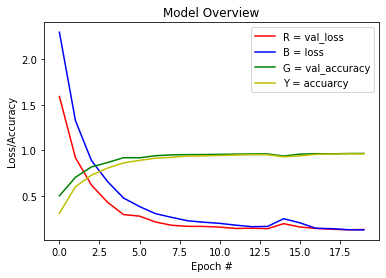

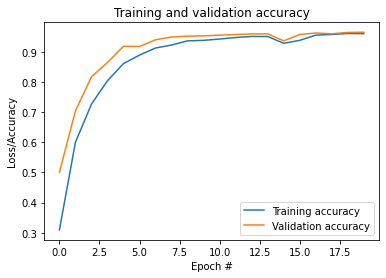

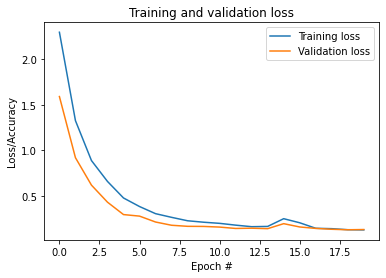

In [16]:
# Declare vars for the plotting of figures 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# overall model scoreing 
plt.plot(val_loss, 'r', loss, 'b', val_accuracy, 'g', accuracy, 'y')
label = 'R = val_loss', 'B = loss', 'G = val_accuracy', 'Y = accuarcy'
plt.title('Model Overview')
plt.legend(label)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

# Training output 
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

# testing output 
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

In [27]:
model.save(Output+"finalmodel.h5")
print("Saved model to disk")

NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.

In [20]:
predictions = model.predict(X_val, batch_size=100)
print(classification_report(Y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))

                precision    recall  f1-score   support

    Agent.BDMJ       1.00      0.91      0.95        11
          Agen       0.86      0.87      0.87        79
       Allaple       1.00      0.97      0.98       131
        Autoit       0.92      0.96      0.94       125
        Berbew       0.99      0.99      0.99       592
        Bitman       0.99      0.97      0.98       155
        Dinwod       0.99      0.99      0.99       271
       Dorkbot       1.00      1.00      1.00        30
        Dridex       1.00      1.00      1.00        66
        Emotet       0.91      0.83      0.87        72
        Fsysna       0.99      0.97      0.98       114
      Hematite       0.98      0.99      0.99       168
InstallMonster       0.92      0.94      0.93        47
        Oberal       0.88      0.80      0.84        46
        Picsys       0.97      0.65      0.78       119
      Salgorea       0.98      1.00      0.99       289
          Scar       0.90      0.61      0.73  